In [1]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from tensorflow.keras.optimizers import SGD
from keras.datasets import mnist
from keras.utils import np_utils


In [2]:
# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [33]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)


array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

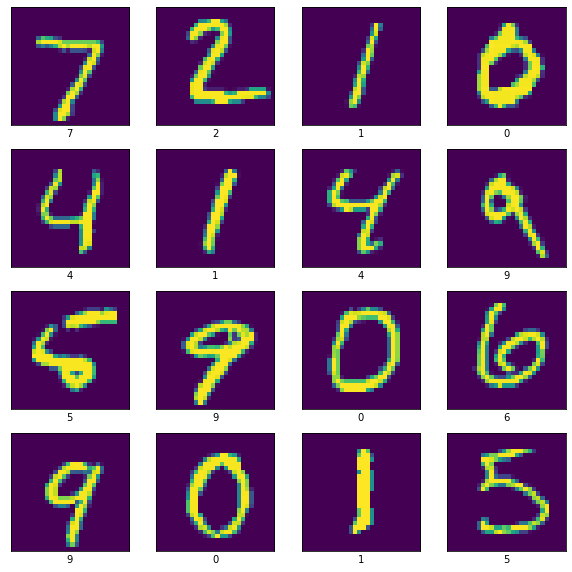

In [11]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 10))

for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i])
    plt.xlabel(y_test[i])

plt.show()




In [4]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
model = Sequential()
conv1 = Conv2D(16,kernel_size=(5, 5),activation='relu',input_shape=(28, 28, 1),padding='valid')
pool1 = MaxPooling2D(pool_size=(2, 2))
conv2 = Conv2D(32,kernel_size=(5, 5),activation='relu',input_shape=(28, 28, 1),padding='valid')
pool2 = MaxPooling2D(pool_size=(2, 2))
model.add(conv1)
model.add(pool1)
model.add(conv2)
model.add(pool2)
model.add(Flatten())
model.add(Dense(100, name='fc1'))
model.add(Activation('sigmoid'))
model.add(Dense(10, name='fc2'))
model.add(Activation('softmax'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 16)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 32)          12832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 fc1 (Dense)                 (None, 100)               5

In [6]:
learning_rate = 0.5
sgd = SGD(learning_rate)
model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])

In [7]:
import numpy as np
batch_size = 100
nb_epoch = 20
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
model.fit(X_train, Y_train,batch_size=batch_size, epochs=nb_epoch,verbose=1)

Epoch 1/20
600/600 [==============================] - 14s 23ms/step - loss: 0.2379 - accuracy: 0.9241
Epoch 2/20
600/600 [==============================] - 13s 22ms/step - loss: 0.0636 - accuracy: 0.9800
Epoch 3/20
600/600 [==============================] - 14s 24ms/step - loss: 0.0440 - accuracy: 0.9864
Epoch 4/20
600/600 [==============================] - 13s 21ms/step - loss: 0.0333 - accuracy: 0.9900
Epoch 5/20
600/600 [==============================] - 14s 24ms/step - loss: 0.0263 - accuracy: 0.9923
Epoch 6/20
600/600 [==============================] - 14s 24ms/step - loss: 0.0205 - accuracy: 0.9944
Epoch 7/20
600/600 [==============================] - 14s 24ms/step - loss: 0.0168 - accuracy: 0.9955
Epoch 8/20
600/600 [==============================] - 14s 23ms/step - loss: 0.0136 - accuracy: 0.9964
Epoch 9/20
600/600 [==============================] - 14s 23ms/step - loss: 0.0108 - accuracy: 0.9973
Epoch 10/20
600/600 [==============================] - 14s 23ms/step - loss: 0.008

<h1> Scores </h1>

In [12]:
scores = model.evaluate(X_test, Y_test, verbose=1)
print("%s: %.2f%%" % (model.metrics_names[0], scores[0]*100))
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

313/313 [==============================] - 2s 5ms/step - loss: 0.0254 - accuracy: 0.9918
loss: 2.54%
accuracy: 99.18%


<h1> Visualisation </h1>

In [39]:
def oneHottoclass(one):
    tmp = []
    for x in one:
        tmp.append(np.argmax(x))
    return tmp
# On detemrine ici la classe la plus probable (avec la plus grande probabilité)

[2, 1]

In [20]:
from sklearn.manifold import TSNE
import pandas as pd


X = np.zeros((X_test.shape[0], 784))
for i in range(X_test.shape[0]):
    X[i] = X_test[i].flatten()
X = pd.DataFrame(X)    
tsne = TSNE(n_iter=300)
tsne_results = tsne.fit_transform(X)

In [25]:
print(X.shape)

(10000, 784)


In [28]:
print(y_test.shape)

(10000,)


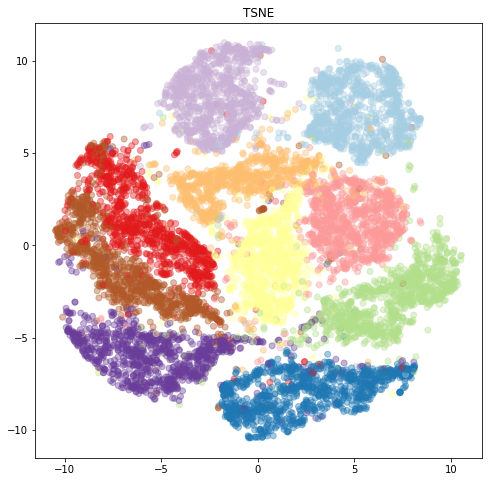

In [27]:
fig = plt.figure( figsize=(8,8) )
ax = fig.add_subplot(1, 1, 1, title='TSNE - Affichage des classes réelles' )
# Create the scatter
ax.scatter(
    x=tsne_results[:,0], 
    y=tsne_results[:,1], 
    c=pd.DataFrame(y_test), 
    cmap=plt.cm.get_cmap('Paired'), 
    alpha=0.4)
plt.show()

In [38]:
prediction = model.predict(X_test)
prediction

array([[9.9102841e-09, 7.9355758e-08, 6.6610943e-07, ..., 9.9999464e-01,
        7.4033153e-09, 3.1172929e-06],
       [5.8052642e-06, 5.5582395e-06, 9.9997246e-01, ..., 1.4759138e-08,
        3.3506171e-06, 2.5031383e-10],
       [9.1878762e-09, 9.9998617e-01, 2.9380121e-08, ..., 2.4158237e-06,
        5.3204315e-07, 2.3351154e-09],
       ...,
       [6.7135311e-11, 1.5712551e-07, 1.7972107e-09, ..., 9.3711078e-06,
        9.2710415e-08, 2.5494137e-07],
       [6.6745042e-07, 1.3888399e-07, 7.7266010e-10, ..., 1.9300475e-09,
        1.5006169e-04, 4.5918036e-08],
       [5.2071658e-07, 4.2071697e-09, 5.7843046e-08, ..., 8.0358172e-11,
        5.9175892e-07, 8.7941160e-10]], dtype=float32)

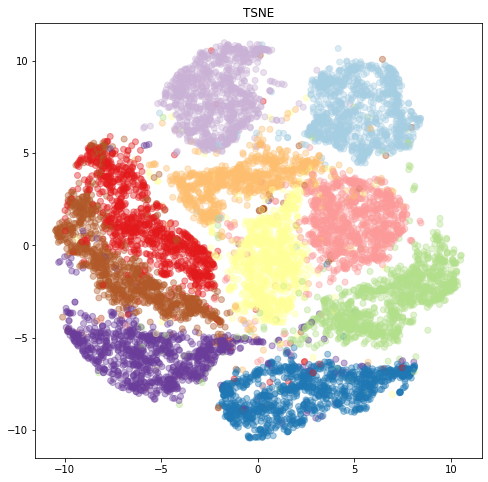

In [40]:
fig = plt.figure( figsize=(8,8) )
ax = fig.add_subplot(1, 1, 1, title='TSNE - 
# Create the scatter
ax.scatter(
    x=tsne_results[:,0], 
    y=tsne_results[:,1], 
    c=oneHottoclass(prediction),
    cmap=plt.cm.get_cmap('Paired'), 
    alpha=0.4)
plt.show()